In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/ML"

In [10]:
%cd /content/gdrive/My Drive/ML

/content/gdrive/My Drive/ML


In [11]:
!kaggle datasets download -d alessiocorrado99/animals10

animals10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
!ls

animals10.zip  kaggle.json  translate.py


In [13]:
import pandas as pd
import numpy as np
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import tensorflow as tf
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm.notebook import tqdm as tq
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

In [14]:
# Ekstrak dataset

local_zip = '/content/gdrive/My Drive/ML/animals10.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/gdrive/My Drive/ML')
zip_ref.close()

In [17]:
import os
from PIL import Image
base_dataset = "/content/gdrive/My Drive/ML/raw-img"
class_dir = ['scoiattolo','ragno','pecora','mucca','gatto','gallina','farfalla','elefante','cavallo','cane']
for class_item in class_dir:
  cur_dir = base_dataset + '/' + class_item + '/'
  dataset = os.listdir(cur_dir)
  for item in dataset :
    im = Image.open(f"{cur_dir}{item}")
    if item.endswith('.jpg'):
      if im.mode == "CMYK":
        im.convert('RGB')
      else :
        im.save(f"{cur_dir}{item.split('.')[0]}.png", "png")
    else :
      im.save(f"{cur_dir}{item.split('.')[0]}.png", "png")
  for item in dataset :
    if not item.endswith('.png'):
      os.remove(os.path.join(cur_dir, item))

In [18]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(base_dataset):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [19]:
# membuat dataframe dari variabel baru
data = pd.DataFrame({'path':full_path,'file_name':file_name,'tag':tag})
data.groupby(['tag']).size()

tag
cane          4863
cavallo       2623
elefante      1445
farfalla      2112
gallina       3098
gatto         1668
mucca         1866
pecora        1820
ragno         4821
scoiattolo    1862
dtype: int64

In [20]:
x = data['path']
y = data['tag']


In [21]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.30)

In [22]:
# menyatukan ke dalam masing-masing dataframe
data_tr = pd.DataFrame({'path':X_train, 'tag':y_train, 'set':'training'})

data_val = pd.DataFrame({'path':X_val, 'tag':y_val, 'set':'validation'})

In [23]:
print('train size', len(data_tr))
print('val size', len(data_val))

train size 18324
val size 7854


In [24]:
#1.3 cek penamaan image 
dataset_path = '/content/gdrive/My Drive/ML/model-raw-img'

data_all = data_tr.append([data_tr, data_val]).reset_index(drop=1)

for index, row in tq(data_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(base_dataset,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

In [25]:
scoiattolo_train = "/content/gdrive/My Drive/ML/model-raw-img/training/scoiattolo"
scoiattolo_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/scoiattolo"
ragno_train = "/content/gdrive/My Drive/ML/model-raw-img/training/ragno"
ragno_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/ragno"
pecora_train = "/content/gdrive/My Drive/ML/model-raw-img/training/pecora"
pecora_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/pecora"
mucca_train = "/content/gdrive/My Drive/ML/model-raw-img/training/mucca"
mucca_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/mucca"
gatto_train = "/content/gdrive/My Drive/ML/model-raw-img/training/gatto"
gatto_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/gatto"
gallina_train = "/content/gdrive/My Drive/ML/model-raw-img/training/gallina"
gallina_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/gallina"
farfalla_train = "/content/gdrive/My Drive/ML/model-raw-img/training/farfalla"
farfalla_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/farfalla"
elefante_train = "/content/gdrive/My Drive/ML/model-raw-img/training/elefante"
elefante_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/elefante"
cavallo_train = "/content/gdrive/My Drive/ML/model-raw-img/training/cavallo"
cavallo_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/cavallo"
cane_train = "/content/gdrive/My Drive/ML/model-raw-img/training/cane"
cane_validation = "/content/gdrive/My Drive/ML/model-raw-img/validation/cane"

file_train_sco = os.listdir(scoiattolo_train)
file_Val_sco = os.listdir(scoiattolo_validation)
file_train_rag = os.listdir(ragno_train)
file_Val_rag = os.listdir(ragno_validation)
file_train_pec = os.listdir(pecora_train)
file_Val_pec = os.listdir(pecora_validation)
file_train_muc = os.listdir(mucca_train)
file_Val_muc = os.listdir(mucca_validation)
file_train_gat = os.listdir(gatto_train)
file_Val_gat = os.listdir(gatto_validation)
file_train_gal = os.listdir(gallina_train)
file_Val_gal = os.listdir(gallina_validation)
file_train_far = os.listdir(farfalla_train)
file_Val_far = os.listdir(farfalla_validation)
file_train_ele = os.listdir(elefante_train)
file_Val_ele = os.listdir(elefante_validation)
file_train_cav = os.listdir(cavallo_train)
file_Val_cav = os.listdir(cavallo_validation)
file_train_can = os.listdir(cane_train)
file_Val_can = os.listdir(cane_validation)

print("data scoiattolo train : " + str(len(file_train_sco)))
print("data scoiattolo validation : " + str(len(file_Val_sco)))
print("data ragno train : " + str(len(file_train_rag)))
print("data ragno validation : " + str(len(file_Val_rag)))
print("data pecora train : " + str(len(file_train_pec)))
print("data pecora validation : " + str(len(file_Val_pec)))
print("data mucca train : " + str(len(file_train_muc)))
print("data mucca validation : " + str(len(file_Val_muc)))
print("data gatto train : " + str(len(file_train_gat)))
print("data gatto validation : " + str(len(file_Val_gat)))
print("data gallina train : " + str(len(file_train_gal)))
print("data gallina validation : " + str(len(file_Val_gal)))
print("data farfalla train : " + str(len(file_train_far)))
print("data farfalla validation : " + str(len(file_Val_far)))
print("data elefante train : " + str(len(file_train_ele)))
print("data elefante validation : " + str(len(file_Val_ele)))
print("data cavallo train : " + str(len(file_train_cav)))
print("data cavallo validation : " + str(len(file_Val_cav)))
print("data cane train : " + str(len(file_train_can)))
print("data cane validation : " + str(len(file_Val_can)))

data scoiattolo train : 1291
data scoiattolo validation : 571
data ragno train : 3380
data ragno validation : 1441
data pecora train : 1267
data pecora validation : 553
data mucca train : 1341
data mucca validation : 525
data gatto train : 1151
data gatto validation : 517
data gallina train : 2152
data gallina validation : 946
data farfalla train : 1489
data farfalla validation : 623
data elefante train : 992
data elefante validation : 453
data cavallo train : 1814
data cavallo validation : 809
data cane train : 3447
data cane validation : 1416


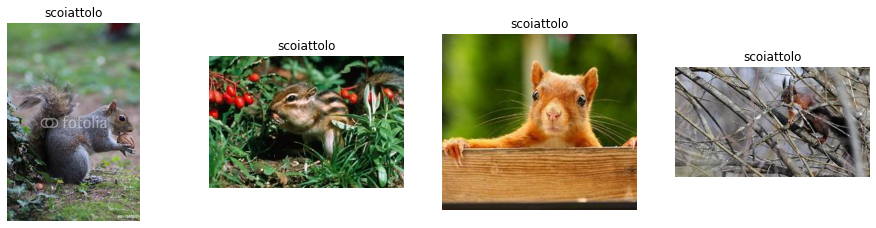

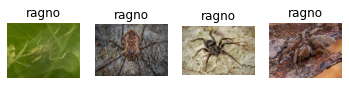

In [26]:
nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

next_sco_pix = [os.path.join(scoiattolo_train, fname)
                 for fname in os.listdir(scoiattolo_train)[:4]]
next_rag_pix = [os.path.join(ragno_train, fname)
                 for fname in os.listdir(ragno_train)[:4]]    

for i, img_path in enumerate(next_sco_pix):
  sp = plt.subplot(2,4, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.title('scoiattolo')
  plt.imshow(img)
plt.show()

for i, img_path in enumerate(next_rag_pix):
  sp = plt.subplot(2,4, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.title('ragno')
  plt.imshow(img)
plt.show()

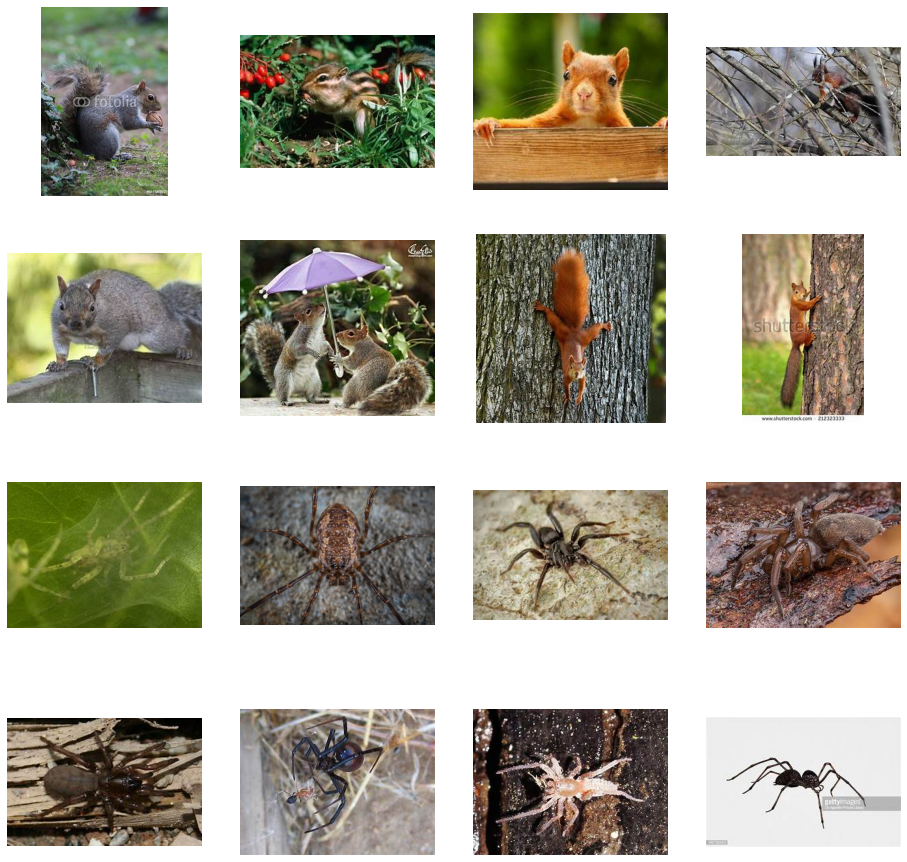

In [27]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_sco_pix = [os.path.join(scoiattolo_train, fname) 
                for fname in os.listdir(scoiattolo_train)[pic_index-8:pic_index]]
next_rag_pix = [os.path.join(ragno_train, fname) 
                for fname in os.listdir(ragno_train)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_sco_pix+next_rag_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


PREPROCESSING

In [28]:
import os
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []

train_dir='/content/gdrive/My Drive/ML/model-raw-img/training'
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [29]:
# Gather data validation
val_data = []
val_label = []

vali_dir='/content/gdrive/My Drive/ML/model-raw-img/training'
for r, d, f in os.walk(vali_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [30]:
print('Data Training Shape : ', train_data.shape)
print('Data Validation Shape : ', val_data.shape)

Data Training Shape :  (18324, 100, 100, 3)
Data Validation Shape :  (18324, 100, 100, 3)


In [31]:
# Tampilan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (18324, 100, 100, 3)
Train Label =  (18324,)
Validation Data =  (18324, 100, 100, 3)
Validation Label =  (18324,)


In [32]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [107 101  82]
Data setelah di-normalisasi  [0.41960785 0.39607844 0.32156864]


In [33]:
from sklearn.preprocessing import LabelEncoder
print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['cane' 'cane' 'cane' 'cane' 'cane' 'cane' 'cane' 'cane' 'cane' 'cane']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0]
